In [6]:
import enum

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet

sns.set_style("darkgrid")

In [2]:
from pathlib import Path

PATH_DATA_RAW = Path("../data/raw").resolve()

PATH_DATA_RAW

PosixPath('/beegfs/.global0/ws/s4610340-sleep_states/kaggle-detect_sleep_states/data/raw')

In [13]:
COL_STEP = "step"
COL_ANGLEZ = "anglez"
COL_ENMO = "enmo"
COL_EVENT = "event"
COL_SERIES_ID = "series_id"
COL_TIMESTAMP = "timestamp"

In [33]:
df_train_events = pd.read_csv(PATH_DATA_RAW / "train_events.csv")
df_train_events[COL_TIMESTAMP] = pd.to_datetime(df_train_events[COL_TIMESTAMP], utc=True)
df_train_events

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-15 02:26:00+00:00
1,038441c925bb,1,wakeup,10932.0,2018-08-15 10:41:00+00:00
2,038441c925bb,2,onset,20244.0,2018-08-15 23:37:00+00:00
3,038441c925bb,2,wakeup,27492.0,2018-08-16 09:41:00+00:00
4,038441c925bb,3,onset,39996.0,2018-08-17 03:03:00+00:00
...,...,...,...,...,...
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06 08:07:00+00:00
14504,fe90110788d2,34,onset,574620.0,2017-09-07 03:35:00+00:00
14505,fe90110788d2,34,wakeup,581604.0,2017-09-07 13:17:00+00:00
14506,fe90110788d2,35,onset,NaN,NaT


In [34]:
df_train_events.dtypes

series_id                 object
night                      int64
event                     object
step                     float64
timestamp    datetime64[ns, UTC]
dtype: object

In [52]:
def read_series(series_id: str, path_series_file: Path) -> pd.DataFrame:
    df = pa.parquet.read_table(
        path_series_file,
        filters=[("series_id", "=", series_id)],
    ).to_pandas()
    df[COL_TIMESTAMP] = pd.to_datetime(df[COL_TIMESTAMP])
    df.set_index(COL_TIMESTAMP, inplace=True)
    return df


df_series = read_series("038441c925bb", PATH_DATA_RAW / "train_series.parquet")
df_series

,series_id,step,anglez,enmo
timestamp,,,,
2018-08-14 15:30:00-04:00,038441c925bb,0,2.636700,0.0217
2018-08-14 15:30:05-04:00,038441c925bb,1,2.636800,0.0215
2018-08-14 15:30:10-04:00,038441c925bb,2,2.637000,0.0216
2018-08-14 15:30:15-04:00,038441c925bb,3,2.636800,0.0213
2018-08-14 15:30:20-04:00,038441c925bb,4,2.636800,0.0215
...,...,...,...,...
2018-09-06 04:59:35-04:00,038441c925bb,389875,-27.373899,0.0110
2018-09-06 04:59:40-04:00,038441c925bb,389876,-27.493799,0.0110
2018-09-06 04:59:45-04:00,038441c925bb,389877,-27.533701,0.0111


In [53]:
df_series.dtypes

series_id     object
step          uint32
anglez       float32
enmo         float32
dtype: object

In [54]:
df_series_events = df_train_events.loc[df_train_events[COL_SERIES_ID] == "038441c925bb"]
df_series_events

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-15 02:26:00+00:00
1,038441c925bb,1,wakeup,10932.0,2018-08-15 10:41:00+00:00
2,038441c925bb,2,onset,20244.0,2018-08-15 23:37:00+00:00
3,038441c925bb,2,wakeup,27492.0,2018-08-16 09:41:00+00:00
4,038441c925bb,3,onset,39996.0,2018-08-17 03:03:00+00:00
5,038441c925bb,3,wakeup,44400.0,2018-08-17 09:10:00+00:00
6,038441c925bb,4,onset,57240.0,2018-08-18 03:00:00+00:00
7,038441c925bb,4,wakeup,62856.0,2018-08-18 10:48:00+00:00
8,038441c925bb,5,onset,NaN,NaT
9,038441c925bb,5,wakeup,NaN,NaT


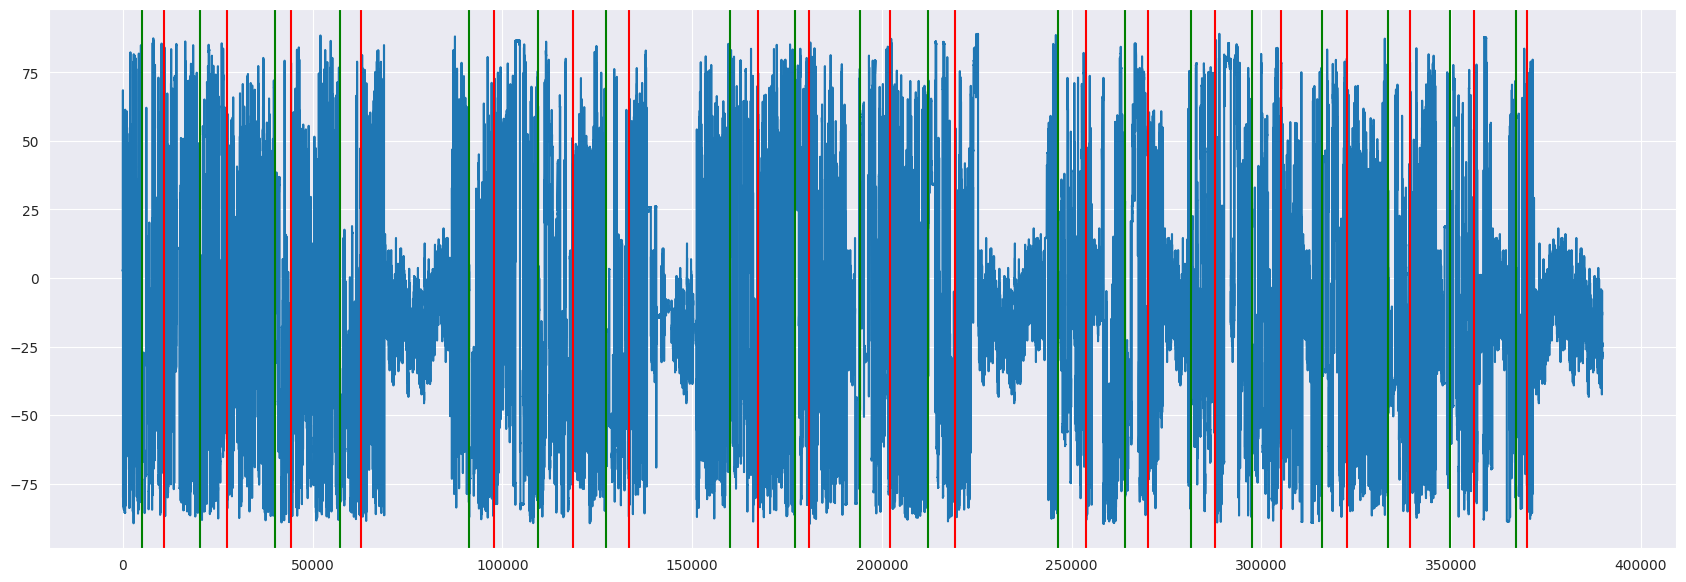

In [55]:
def plot_series(df_series: pd.DataFrame, df_series_events: pd.DataFrame, ax: plt.Axes):
    ax.plot(df_series[COL_STEP], df_series[COL_ANGLEZ], label=COL_ANGLEZ)
    #ax.plot(df_series[COL_STEP], df_series[COL_ANGLEZ], label=COL_ENMO)

    df_onset_events = df_series_events.loc[df_series_events[COL_EVENT] == "onset"]
    df_wakeup_events = df_series_events.loc[df_series_events[COL_EVENT] == "wakeup"]

    for step in df_onset_events[COL_STEP]:
        ax.axvline(step, color="green", label="onset")

    for step in df_wakeup_events[COL_STEP]:
        ax.axvline(step, color="red", label="wakeup")


fig, ax = plt.subplots(figsize=(21, 7))

plot_series(df_series, df_series_events=df_series_events, ax=ax)

<Axes: xlabel='anglez', ylabel='Count'>

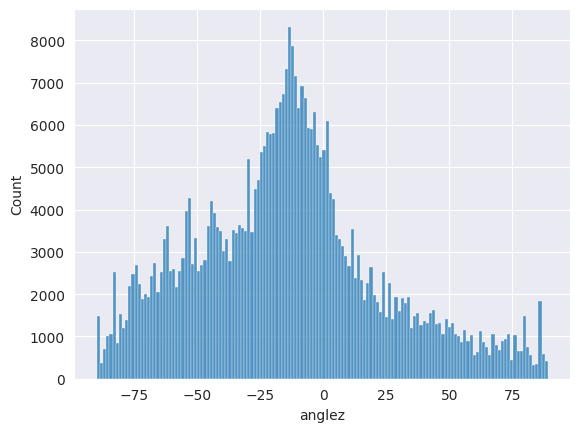

In [56]:
sns.histplot(data=df_series, x="anglez")

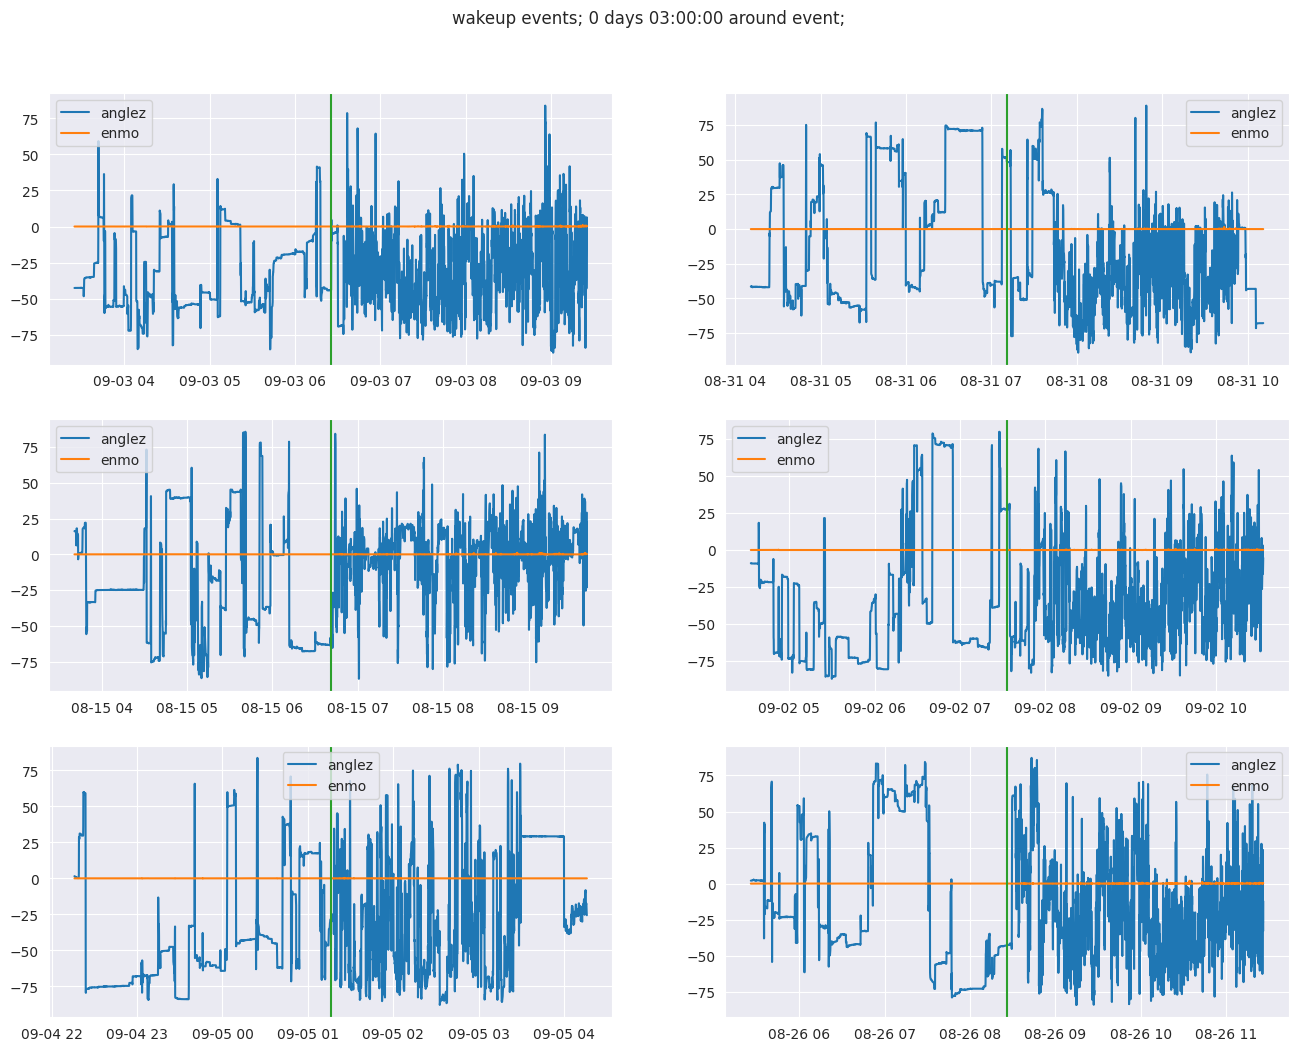

In [59]:
import enum


class Event(enum.Enum):
    onset = "onset"
    wakeup = "wakeup"


def plot_series_around_point(
        t: pd.Timestamp,
        df_series: pd.DataFrame,
        ax: plt.Axes,
        interval_delta: pd.Timedelta
):
    t_from = t - interval_delta
    t_to = t + interval_delta
    df_interval = df_series.loc[t_from:t_to]

    colors = sns.color_palette()

    ax.plot(df_interval.index, df_interval[COL_ANGLEZ], label=COL_ANGLEZ, color=colors[0])
    ax.plot(df_interval.index, df_interval[COL_ENMO], label=COL_ENMO, color=colors[1])

    ax.axvline(t, color=colors[2])

    ax.legend()


def plot_multiple_events(
        df_series: pd.DataFrame,
        interval_delta: pd.Timedelta,
        event: Event,
):
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
    axs = axs.flatten()
    events_sample = df_series_events.dropna().loc[df_train_events[COL_EVENT] == event.value].sample(n=6)
    for t, ax in zip(events_sample[COL_TIMESTAMP], axs):
        plot_series_around_point(
            t=t,
            df_series=df_series,
            ax=ax,
            interval_delta=interval_delta
        )

    fig.suptitle(f"{Event.wakeup.value} events; {interval_delta} around event;", y=0.95)


plot_multiple_events(df_series, pd.Timedelta(3, unit="h"), event=Event.wakeup)


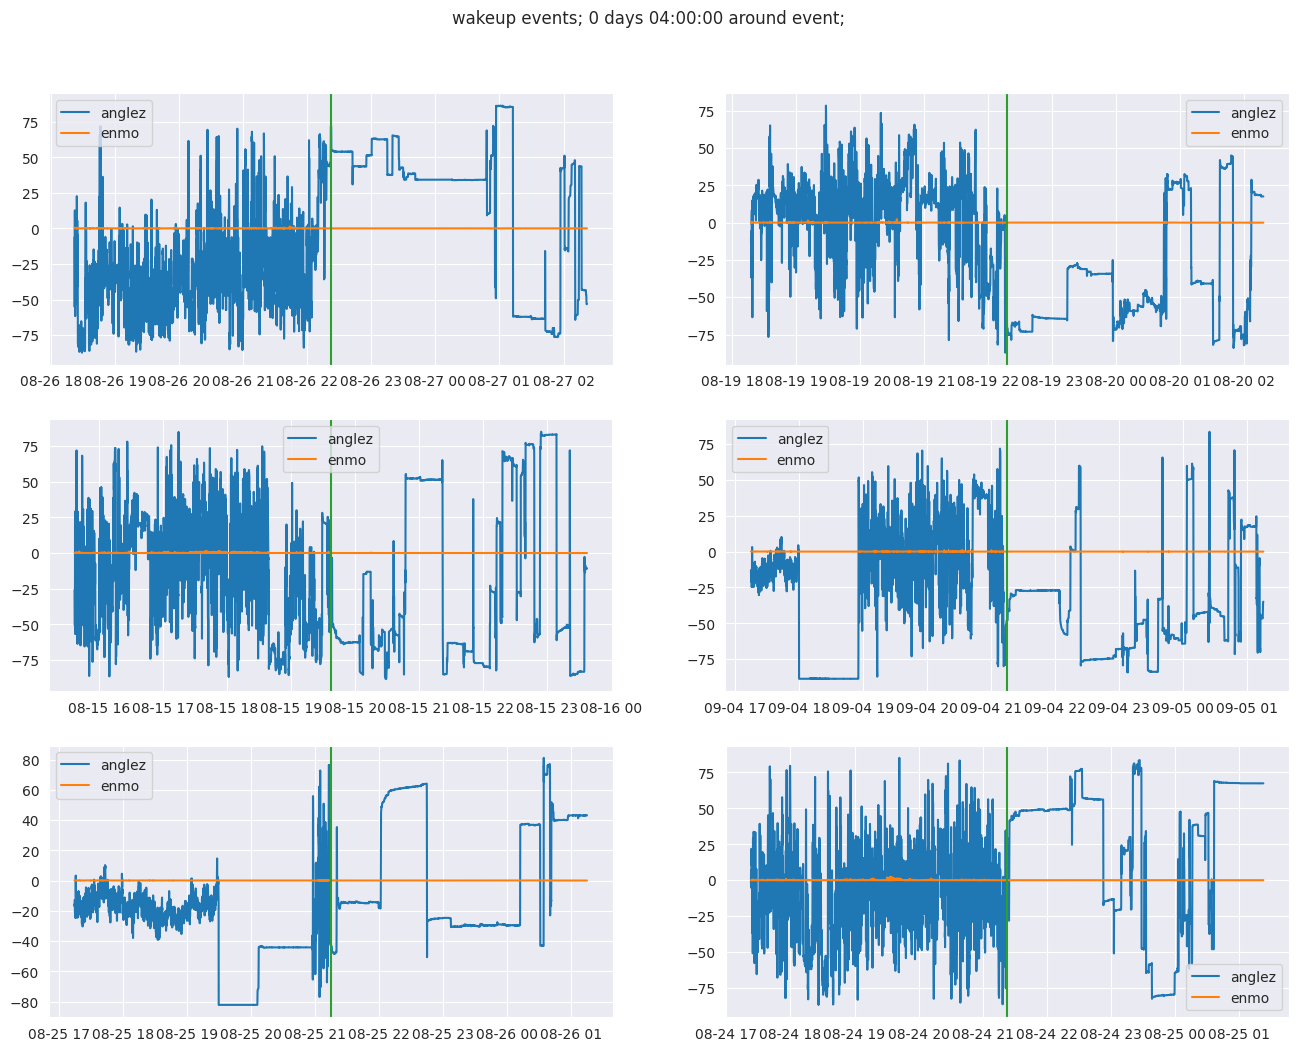

In [82]:
plot_multiple_events(df_series, pd.Timedelta(4, unit="h"), event=Event.onset)

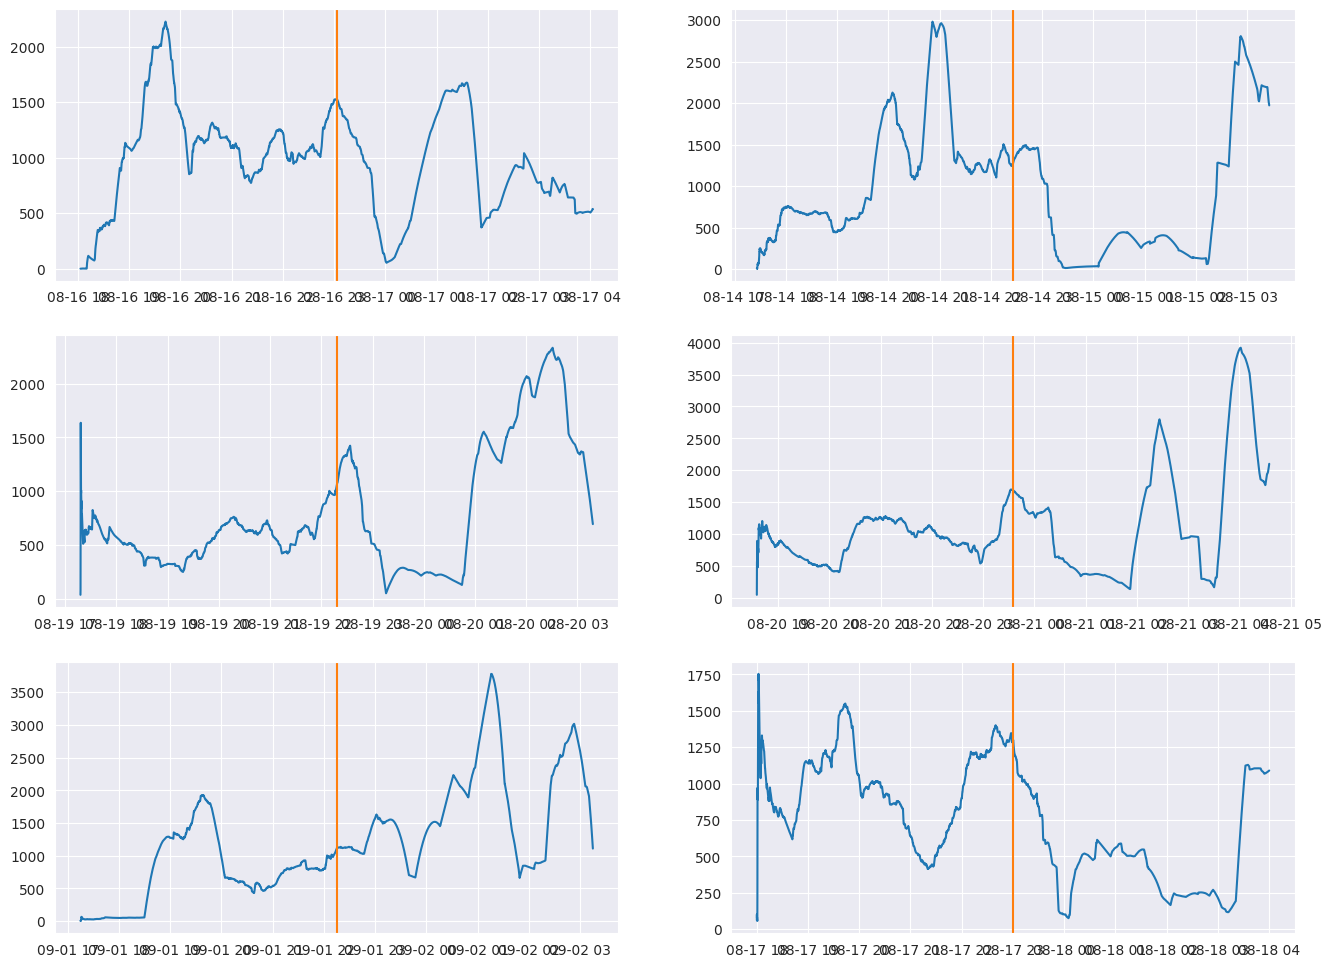

In [80]:
import numpy as np
from typing import Sequence, Generator


def get_events_sample(df_events: pd.DataFrame, event: Event, n: int) -> Sequence[pd.Timestamp]:
    return df_events.dropna().loc[df_events[COL_EVENT] == event.value].sample(n=n)[COL_TIMESTAMP]


def iterate_over_events_range(
        df_series: pd.DataFrame,
        ts: Sequence[pd.Timestamp],
        interval_delta: pd.Timedelta
) -> Generator[pd.DataFrame, None, None]:
    for t in ts:
        yield df_series.loc[t - interval_delta:t + interval_delta]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axs = axs.flatten()

interval_delta = pd.Timedelta(5, unit="h")
events_sample = get_events_sample(df_events=df_series_events, event=Event.onset, n=6)
events_df_iter = iterate_over_events_range(df_series, events_sample, interval_delta)

event_df: pd.DataFrame
for t, event_df, ax in zip(events_sample, events_df_iter, axs):
    ax.plot(
        event_df.index,
        event_df[COL_ANGLEZ].rolling(window=pd.Timedelta(1, unit="h")).var(),
        color=sns.color_palette()[0],
        label="var"
    )
    ax.axvline(t, color=sns.color_palette()[1])
    


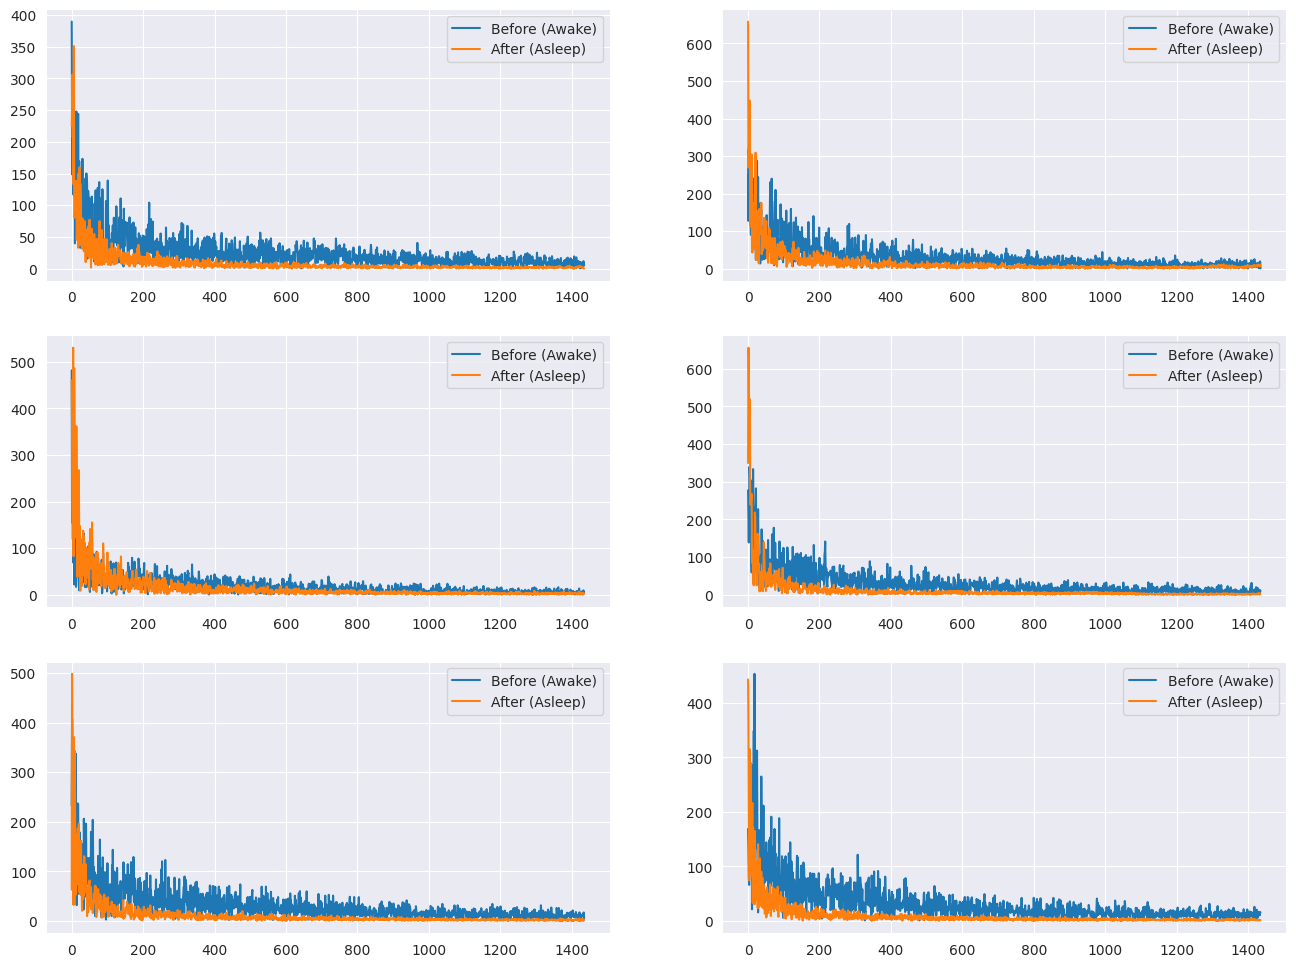

In [98]:
from scipy.fft import fft, rfft
from scipy.stats import kurtosis

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axs = axs.flatten()

interval_delta = pd.Timedelta(4, unit="h")
events_sample = get_events_sample(df_events=df_series_events, event=Event.onset, n=6)
events_df_iter = iterate_over_events_range(df_series, events_sample, interval_delta)

event_df: pd.DataFrame    

def normalize(xs):
    return (xs - xs.mean()) / xs.std() 

for t, event_df, ax in zip(events_sample, events_df_iter, axs):
    anglez_before = event_df.loc[:t][COL_ANGLEZ].values
    anglez_before = normalize(anglez_before)
    
    anglez_after = event_df.loc[t:][COL_ANGLEZ].values
    anglez_after = normalize(anglez_after)
    
    anglez_before_amplitudes = rfft(anglez_before)
    ax.plot(np.abs(anglez_before_amplitudes)[5:], label="Before (Awake)")
    
    anglez_after_amplitudes = rfft(anglez_after)
    ax.plot(np.abs(anglez_after_amplitudes)[5:], label="After (Asleep)")
    
    ax.legend()

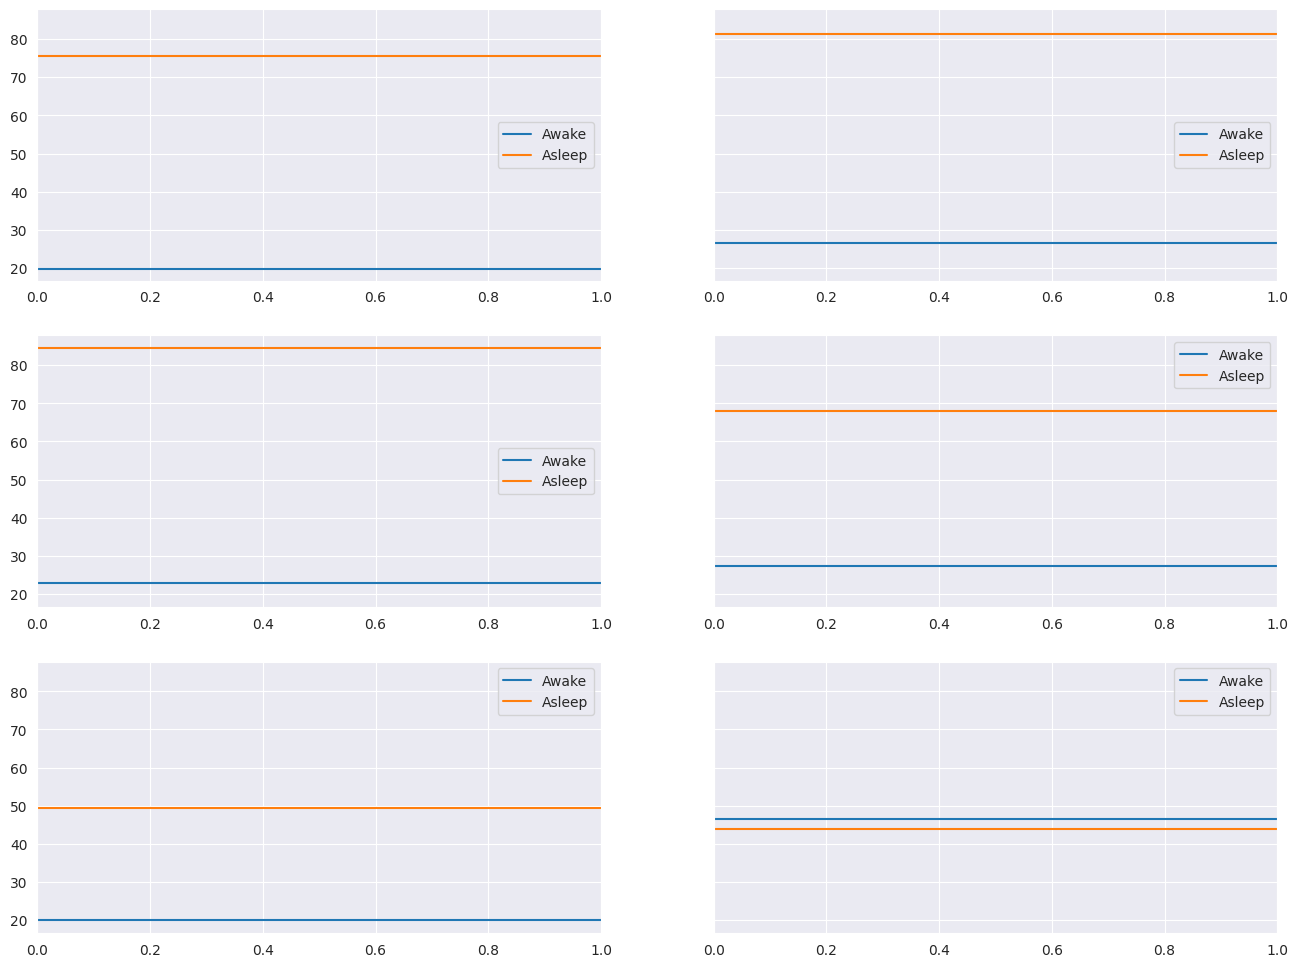

In [104]:
from scipy.fft import fft, rfft
from scipy.stats import kurtosis

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12), sharey=True)
axs = axs.flatten()

interval_delta = pd.Timedelta(4, unit="h")
events_sample = get_events_sample(df_events=df_series_events, event=Event.onset, n=6)
events_df_iter = iterate_over_events_range(df_series, events_sample, interval_delta)

event_df: pd.DataFrame    

for t, event_df, ax in zip(events_sample, events_df_iter, axs):
    df_before = event_df.loc[:t]
    df_after = event_df.loc[t:]
    
    anglez_before_amplitudes = rfft(df_before[COL_ANGLEZ].values)
    ax.axhline(kurtosis(np.abs(anglez_before_amplitudes)[10:]), color=sns.color_palette()[0], label="Awake")
    
    anglez_after_amplitudes = rfft(df_after[COL_ANGLEZ].values)
    ax.axhline(kurtosis(np.abs(anglez_after_amplitudes)[10:]), color=sns.color_palette()[1], label="Asleep")
    
    ax.legend()